# Week 05, Part 2

### Topics
 1. Review: Plotting Percentiles
 1. Example: comparing SAT & ACT scores
 1. BACK TO SLIDES FOR PERCENTILE -> ZSCORE

In [5]:
# resize plots
require(repr)
options(repr.plot.width=4, repr.plot.height=4)

Loading required package: repr


## 1. Review: Plotting Percentiles

(Sometimes we do this in this week instead of the last one so its included here just in case).

Let's use some tools in R to visualize percentiles. To do this, we'll take a little detour into the drawing of shapes in R in general.

Let's begin with our old friend, the sequence:

In [6]:
x = seq(-3,3, length=10)

Now, let's try to understand a polygon function.  We'll be using a pre-compiled version but its worth drawing a few by hand to get a feel.

Let's make a triangle.  And let's say the triangle goes from -3 to +3 in x & 0-1 in y. We can use our sequence to plot this.

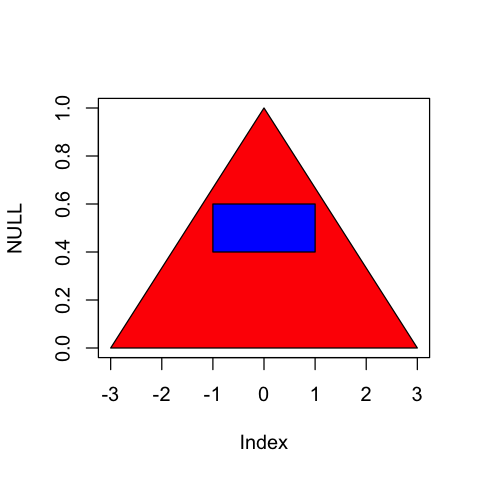

In [7]:
plot(NULL,xlim=c(-3,3),ylim=c(0,1)) # sets up axes, plots nothing.
# Triangle will be defined by 3 verticies:
# (-3, 0), (0, 1), (3, 0)
xvertices = c(-3, 0, 3) # where x "hits" for each vertex
yvertices = c(0, 1, 0) # where y "hits" for each vertex
polygon(xvertices, yvertices,col="red") # plots on top of previous plot

# Lets try overplotting a little rectangle with bottom vertex at 
#  x = (-1,1), y = (0.4,0.6)
xvertices = c(-1, -1, 1, 1)
yvertices = c(0.4, 0.6, 0.6, 0.4)
polygon(xvertices, yvertices, col="blue")

What have we learned?

Essentially, `polygon` just fills in between a list of verticies we give it.  We can use this to plot underneath our normal distributions.  This will help us get a "feel" for how much of the graph is related to our measurement of interest.

ONTO Plotting percentiles! 

Let's source the `plot_polygons` script so that we can use the function in there to plot polygons for us.  This was stored in last week, so we will source from there:

In [8]:
source('../week04/plot_polygons.R')

Let's recall the sum under the curve of our normal probability distribution has to == 1.  Given the laws of probability, we can associate every $Z_{score}$ with a percentile.

Let's go back to our toy example of a "normal" normal distribution centered a 0, with SD=1:

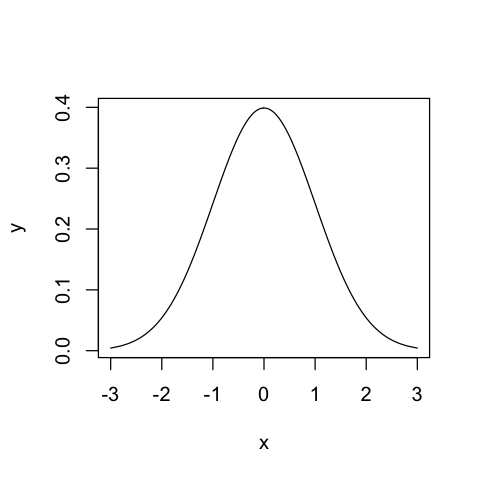

In [9]:
x = seq(-3,3,length=200)
y = dnorm(x,mean=0,sd=1)
plot(x,y,type='l')

What is the $Z_{score}$ for x=0?

In [10]:
Zscore = (0-0)/1 # = 0

Plot too:

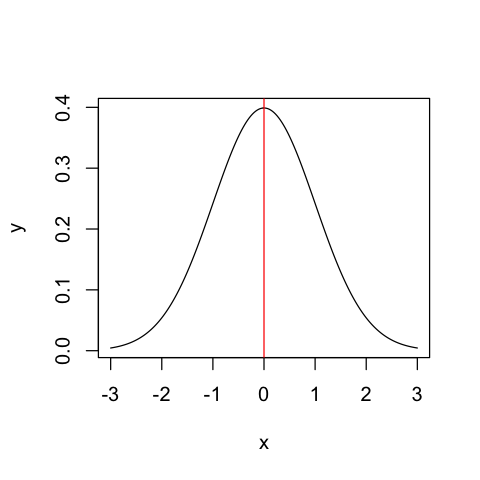

In [11]:
x = seq(-3,3,length=200)
y = dnorm(x,mean=0,sd=1)
plot(x,y,type='l')
abline(v=Zscore, col='red')

What is the percentile?  i.e. what percent under the curve corresponds to a Zscore of 0 here?

First, let's plot with a polygon.

Let's make sure we are only giving vertices up to $Z_{score}$ = 0.

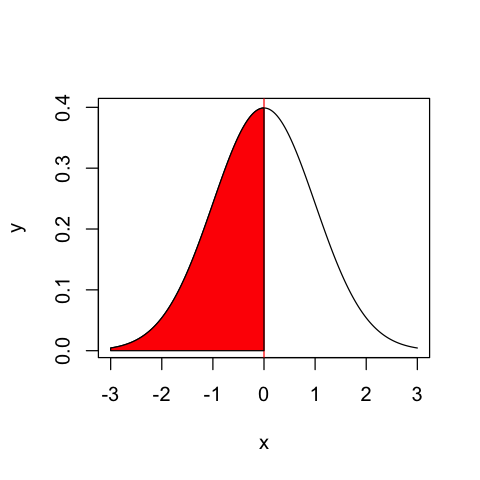

In [12]:
x = seq(-3,3,length=200)
y = dnorm(x,mean=0,sd=1)
plot(x,y,type='l')
abline(v=Zscore, col='red')

# overplot polygon
x2 = seq(-3, Zscore,length=100) # sequence "up to" our Zscore of interest
y2 = dnorm(x2, mean=0, sd=1) # y-values from dnorm
draw_polygon(x2,y2)

The above call to polygon might seem a little confusing and weird at first.  This is just what we did with our simple drawings of triangles and rectanges but now our shape is just a bit more complicated.  You can use this code as a reference and plug in the values for your particular problem.

Given the area under the whole curve is 1.0, what do you think the area of the shaded region is?

**TAKE A MOMENT TO THINK ABOUT IT**

By eye we can see that its probably 1/2 or a percentile of 50%.  But we can also get an exact number using "pnorm".

In [13]:
print(pnorm(Zscore,mean=0,sd=1))

[1] 0.5


Note the similar calling sequence to "dnorm".  This will be a constant source of confusion, so you might want to try to remember that "d" stands for probability density and "p" for percentile.

In fact, we can do this percentage-from-Zscore for any Zscore.

Let's try a few:

Make a plot of the percentile associated with negative "X"

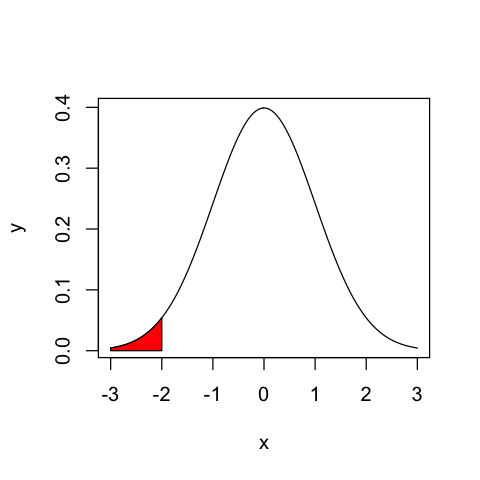

In [14]:
plot(x,y,type='l')
Zscore_of_interest = -2
x2 = seq(-3, Zscore_of_interest,length=100)
y2 = dnorm(x2, mean=0, sd=1)
draw_polygon(x2,y2)

Before calling pnorm, what percentage do you estimate this to be? **TAKE A MOMENT**

Now, print:

In [15]:
print(pnorm(Zscore_of_interest,mean=0,sd=1))

[1] 0.02275013


This is now showing results for the area < some $Z_{score}$. What about if we want to know the area for > some Zscore?

Example with `lower.tail=FALSE`:

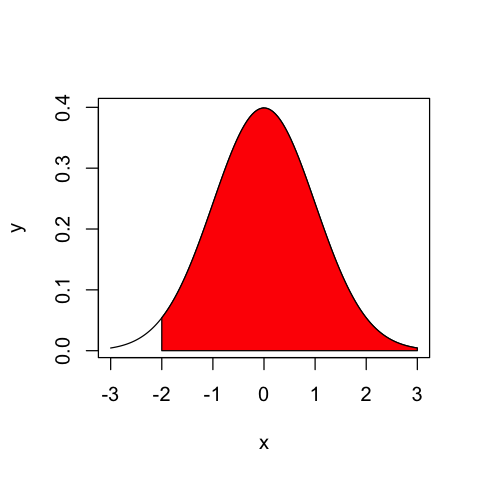

In [16]:
plot(x,y,type='l')
x2 = seq(Zscore_of_interest,3,length=100)
y2 = dnorm(x2,mean=0,sd=1)
# Before we where drawing "up to" our Z-score, now we'll draw "starting from" our Z-score:
draw_polygon(x2,y2)

There are 2 ways to calculate this red area:

 i. since we know the whole area, whole probility distribution, = 1 we can use our P(E) = 1-P(not E) type calculation:

In [17]:
print(1-pnorm(Zscore_of_interest,mean=0,sd=1))

[1] 0.9772499


 ii. We can also explicity tell pnorm to use the "upper tail" of the distribution:


In [18]:
print(pnorm(Zscore_of_interest,mean=0,sd=1,lower.tail=FALSE))

[1] 0.9772499


I can also ask for the percentage of the curve between 2 observations.

Let's start with our original plot:

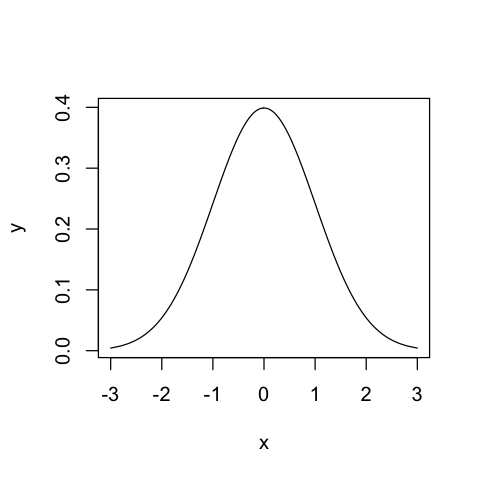

In [19]:
x = seq(-3,3,length=200)
y = dnorm(x,mean=0,sd=1)
plot(x,y,type='l')

What percentage of the curve is between -1 and 1?  First, lets plot this with our polygon function.

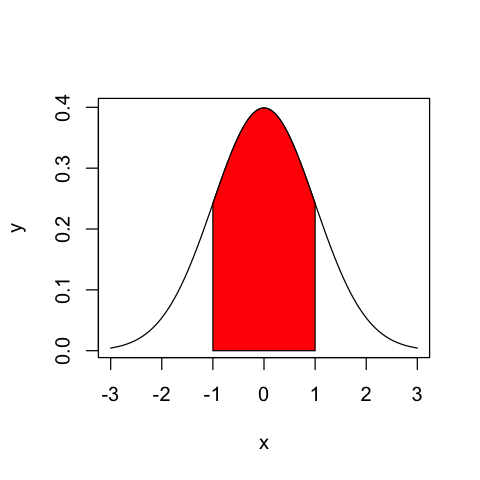

In [20]:
x = seq(-3,3,length=200)
y = dnorm(x,mean=0,sd=1)
plot(x,y,type='l')

# add in area between curves
x2 = seq(-1,1,length=100)
y2 = dnorm(x2,mean=0,sd=1)
draw_polygon(x2,y2)

Note here we are plotting "between" two Z-scores -1 to 1.

For the calculation of percentage, we have to subtract one from the other like so:

In [21]:
print(pnorm(1.0,mean=0,sd=1)-pnorm(-1.0,mean=0,sd=1))

[1] 0.6826895


Hey look, we get our "68%" part of the "68-95-99" rule.  This makes sense since we are measuring 1 SD from the mean in each direction.

## 2. Example: comparing SAT & ACT scores

Let's try with an example.

The mean for SAT scores is 1500 & the SD is 300 points. The mean for ACT scores is 24.0 and the SD is 3.5.  A student gets 1750 on the SATs and 31 on the ACT.

Q1: Use plots to justify which the student did better on.

Q2: Calculate each $Z_{score}$ $\rightarrow$ was your reasoning justified?

Q3: Make plots showing the percentiles with the polygon function, which looks like the larger percentile?

Q4: Calculate each percentile $\rightarrow$ justified Q3?

**ANS 1:** Plot the both scores:

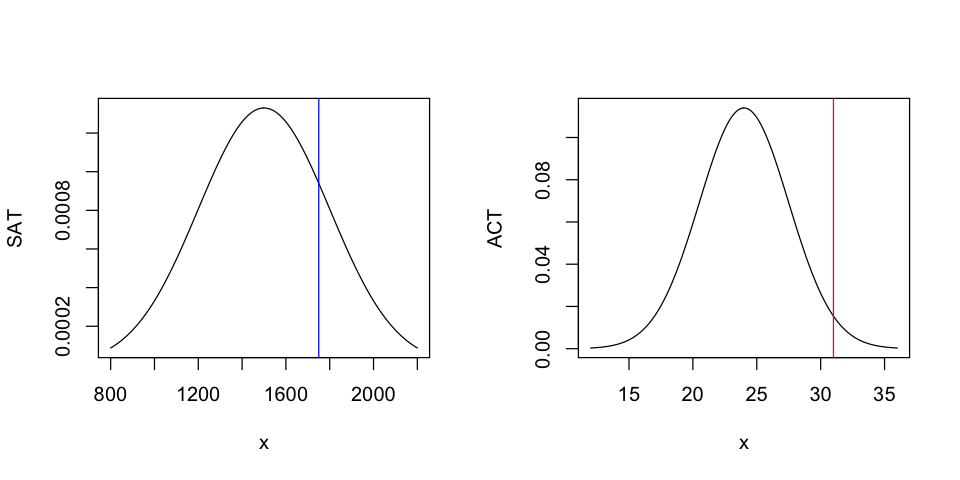

In [23]:
options(repr.plot.width=8, repr.plot.height=4)

par(mfrow=c(1,2)) # 2 plots
# Plot SATs
x=seq(800,2200,length=200)
plot(x,dnorm(x,mean=1500,sd=300),type='l', ylab='SAT')
abline(v=1750,col="blue")

# Plot ACTs
x=seq(12,36,length=200)
plot(x,dnorm(x,mean=24,sd=3.5),type='l', ylab='ACT')
abline(v=31,col="red")

By eye ACT $Z_{score}$ > SAT $Z_{score}$.

**ANS 2:**

NOTE: here I'm assuming the max scores for each are effectively infinite, an ok approximation here.

In [27]:
Z_sat = (1750-1500)/300
Z_act = (31-24)/3.5
print('SAT      ACT')
print(c(Z_sat,Z_act))

[1] "SAT      ACT"
[1] 0.8333333 2.0000000


0.833 < 2.0 so this indeed agrees with our intuition.

**ANS 3:**

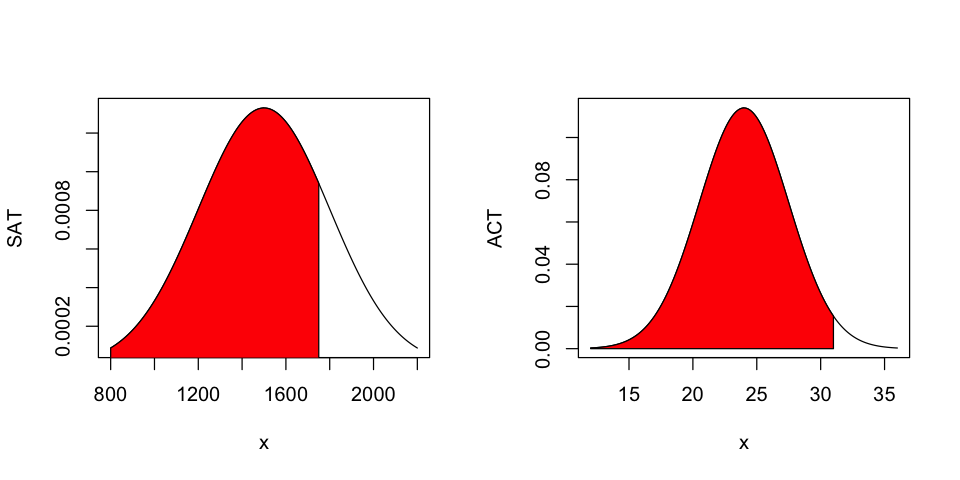

In [29]:
par(mfrow=c(1,2)) # 2 plots

# SAT
x=seq(800,2200,length=200)
plot(x,dnorm(x,mean=1500,sd=300),type='l', ylab='SAT')
# SAT Percentile
x2 = seq(800,1750,length=200)
y2 = dnorm(x2,mean=1500,sd=300)
draw_polygon(x2,y2)

# ACT
x=seq(12,36,length=200)
plot(x,dnorm(x,mean=24,sd=3.5),type='l', ylab='ACT')
# ACT Percentile
x2 = seq(12,31,length=200)
y2 = dnorm(x2,mean=24,sd=3.5)
draw_polygon(x2,y2)


**ANS 4:**

In [30]:
print('SAT, ACT - percentiles')
print(c(pnorm(1750,mean=1500,sd=300),pnorm(31,mean=24,sd=3.5)))

[1] "SAT, ACT - percentiles"
[1] 0.7976716 0.9772499


So: much higher percentile for ACT

## BACK TO SLIDES FOR PERCENTILE -> ZSCORE